Увеличил количество ядер на сверточных слоях, увеличил количество эпох обучения, по итогу сеть верно определила 7 из 10 изображений.
Вопрос: хотелось бы чтобы вы подробнее объяснили механизмы инициализации сети и функции forward. Код из блокнота есть  в мануале pytorch, но у меня нет понимания, что это за функция и как ее дополнять. Из-за этого как не старался, не смог добавить новый светочный слой.


#### Загрузка существующего датасета:

In [2]:
from torch import nn 
from torch import optim
from torch.autograd import Variable
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [4]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([3, 32, 32])
6


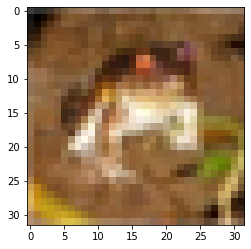

In [5]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [33]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10,
                                         shuffle=False)

Files already downloaded and verified


In [17]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Определим следующую модель:

In [12]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [54]:
for epoch in range(4):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.174
[1,   601] loss: 0.175
[2,     1] loss: 0.001
[2,   301] loss: 0.173
[2,   601] loss: 0.169
[3,     1] loss: 0.001
[3,   301] loss: 0.167
[3,   601] loss: 0.167
[4,     1] loss: 0.001
[4,   301] loss: 0.164
[4,   601] loss: 0.162
Training is finished!


In [60]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

In [61]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car


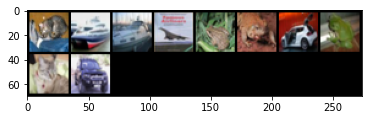

In [62]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

In [ ]:
print(outputs)

tensor([[-1.0140, -0.4172,  0.7943,  1.7267, -0.3132,  1.6487,  1.0944, -1.3442,
          0.3265, -0.2044],
        [ 4.2120,  3.3777, -0.6366, -3.4576,  0.0717, -4.3322, -3.6657, -3.5366,
          5.7506,  2.9089],
        [ 2.1425,  3.7064, -1.0406, -2.0158, -1.0331, -2.6569, -2.5709, -2.9577,
          3.7213,  3.1935],
        [ 3.5605,  2.0153,  0.3879, -1.9209,  0.2129, -2.4324, -3.0770, -2.5827,
          4.7159,  0.6809]], grad_fn=<AddmmBackward>)


In [63]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

Predicted:    cat plane   car plane  frog  frog   car  frog   dog   car


Задача 2. 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# download and transform train dataset
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=True,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

# download and transform test dataset
test_loader = torch.utils.data.DataLoader(datasets.MNIST('../mnist_data', 
                                                          download=True, 
                                                          train=False,
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(), # first, convert image to PyTorch tensor
                                                              transforms.Normalize((0.1307,), (0.3081,)) # normalize inputs
                                                          ])), 
                                           batch_size=10, 
                                           shuffle=True)

class CNNClassifier(nn.Module):
    """Custom module for a simple convnet classifier"""
    def __init__(self):
        super(CNNClassifier, self).__init__()
        
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        
        
        # flatten 28x28x1 = 784
        x = x.view(-1, 784)
        
        # 784 -> 128
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2, training=self.training)
        
        # 128 -> 10
        x = self.fc2(x)
        
        # transform to logits
        return F.log_softmax(x)

# create classifier and optimizer objects
clf = CNNClassifier()
opt = optim.Adam(clf.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

loss_history = []
acc_history = []

def train(epoch):
    clf.train() # set model in training mode (need this because of dropout)
    
    # dataset API gives us pythonic batching 
    for batch_id, (data, label) in enumerate(train_loader):
        data = Variable(data)
        target = Variable(label)
        
        # forward pass, calculate loss and backprop!
        opt.zero_grad()
        preds = clf(data)
        loss = criterion(preds, target) #nll_loss(preds, target)
        loss.backward()
        loss_history.append(loss.data)
        opt.step()
        
        if batch_id % 1000 == 0:
            print(loss.data)

def test(epoch):
    clf.eval() # set model in inference mode (need this because of dropout)
    test_loss = 0
    correct = 0
    
    for data, target in test_loader:
        data = Variable(data, volatile=True) 
        target = Variable(target)
        
        output = clf(data)
        test_loss += F.nll_loss(output, target).data
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss = test_loss
    test_loss /= len(test_loader) # loss function already averages over batch size
    accuracy = 100. * correct / len(test_loader.dataset)
    acc_history.append(accuracy)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        accuracy))

for epoch in range(0, 3):
    print("Epoch %d" % epoch)
    train(epoch)
    test(epoch)

Epoch 0
tensor(2.3210)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(0.5354)
tensor(1.6050)
tensor(0.6111)
tensor(0.2794)
tensor(0.6300)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.



Test set: Average loss: 0.5446, Accuracy: 8327/10000 (83%)

Epoch 1
tensor(0.5745)
tensor(0.0645)
tensor(3.8286)
tensor(0.2232)
tensor(1.0288)
tensor(0.2898)

Test set: Average loss: 0.4298, Accuracy: 8916/10000 (89%)

Epoch 2
tensor(0.5375)
tensor(0.6646)
tensor(0.2393)
tensor(0.7609)
tensor(0.5069)
tensor(0.0237)

Test set: Average loss: 0.5076, Accuracy: 8729/10000 (87%)

